In [1]:
import torch
import torch.nn as nn
from universalNet import universalNet
from universalNet_utils import n_hot_patterns
import matplotlib.pyplot as plt

In [2]:
# Initialize network
hparams = {'seed': 42,
           'dales_law': False}

params_dict = {'layer0': 
                   {'E': {'n': 7}},
               'layer1':
                   {'E': {'n': 21,
                          'activation': 'softplus',
                          'bias': True,
                          'bias_rule': 'backprop',
                          'inputs': {'layer0.E': {'distribution': 'uniform',
                                                  'bounds': (0,1),
                                                  'direction': 'FF',
                                                  'learning_rule': 'backprop'}}
                          }}}

model = universalNet(params_dict, **hparams)

100%|██████████| 100/100 [00:01<00:00, 50.84it/s]


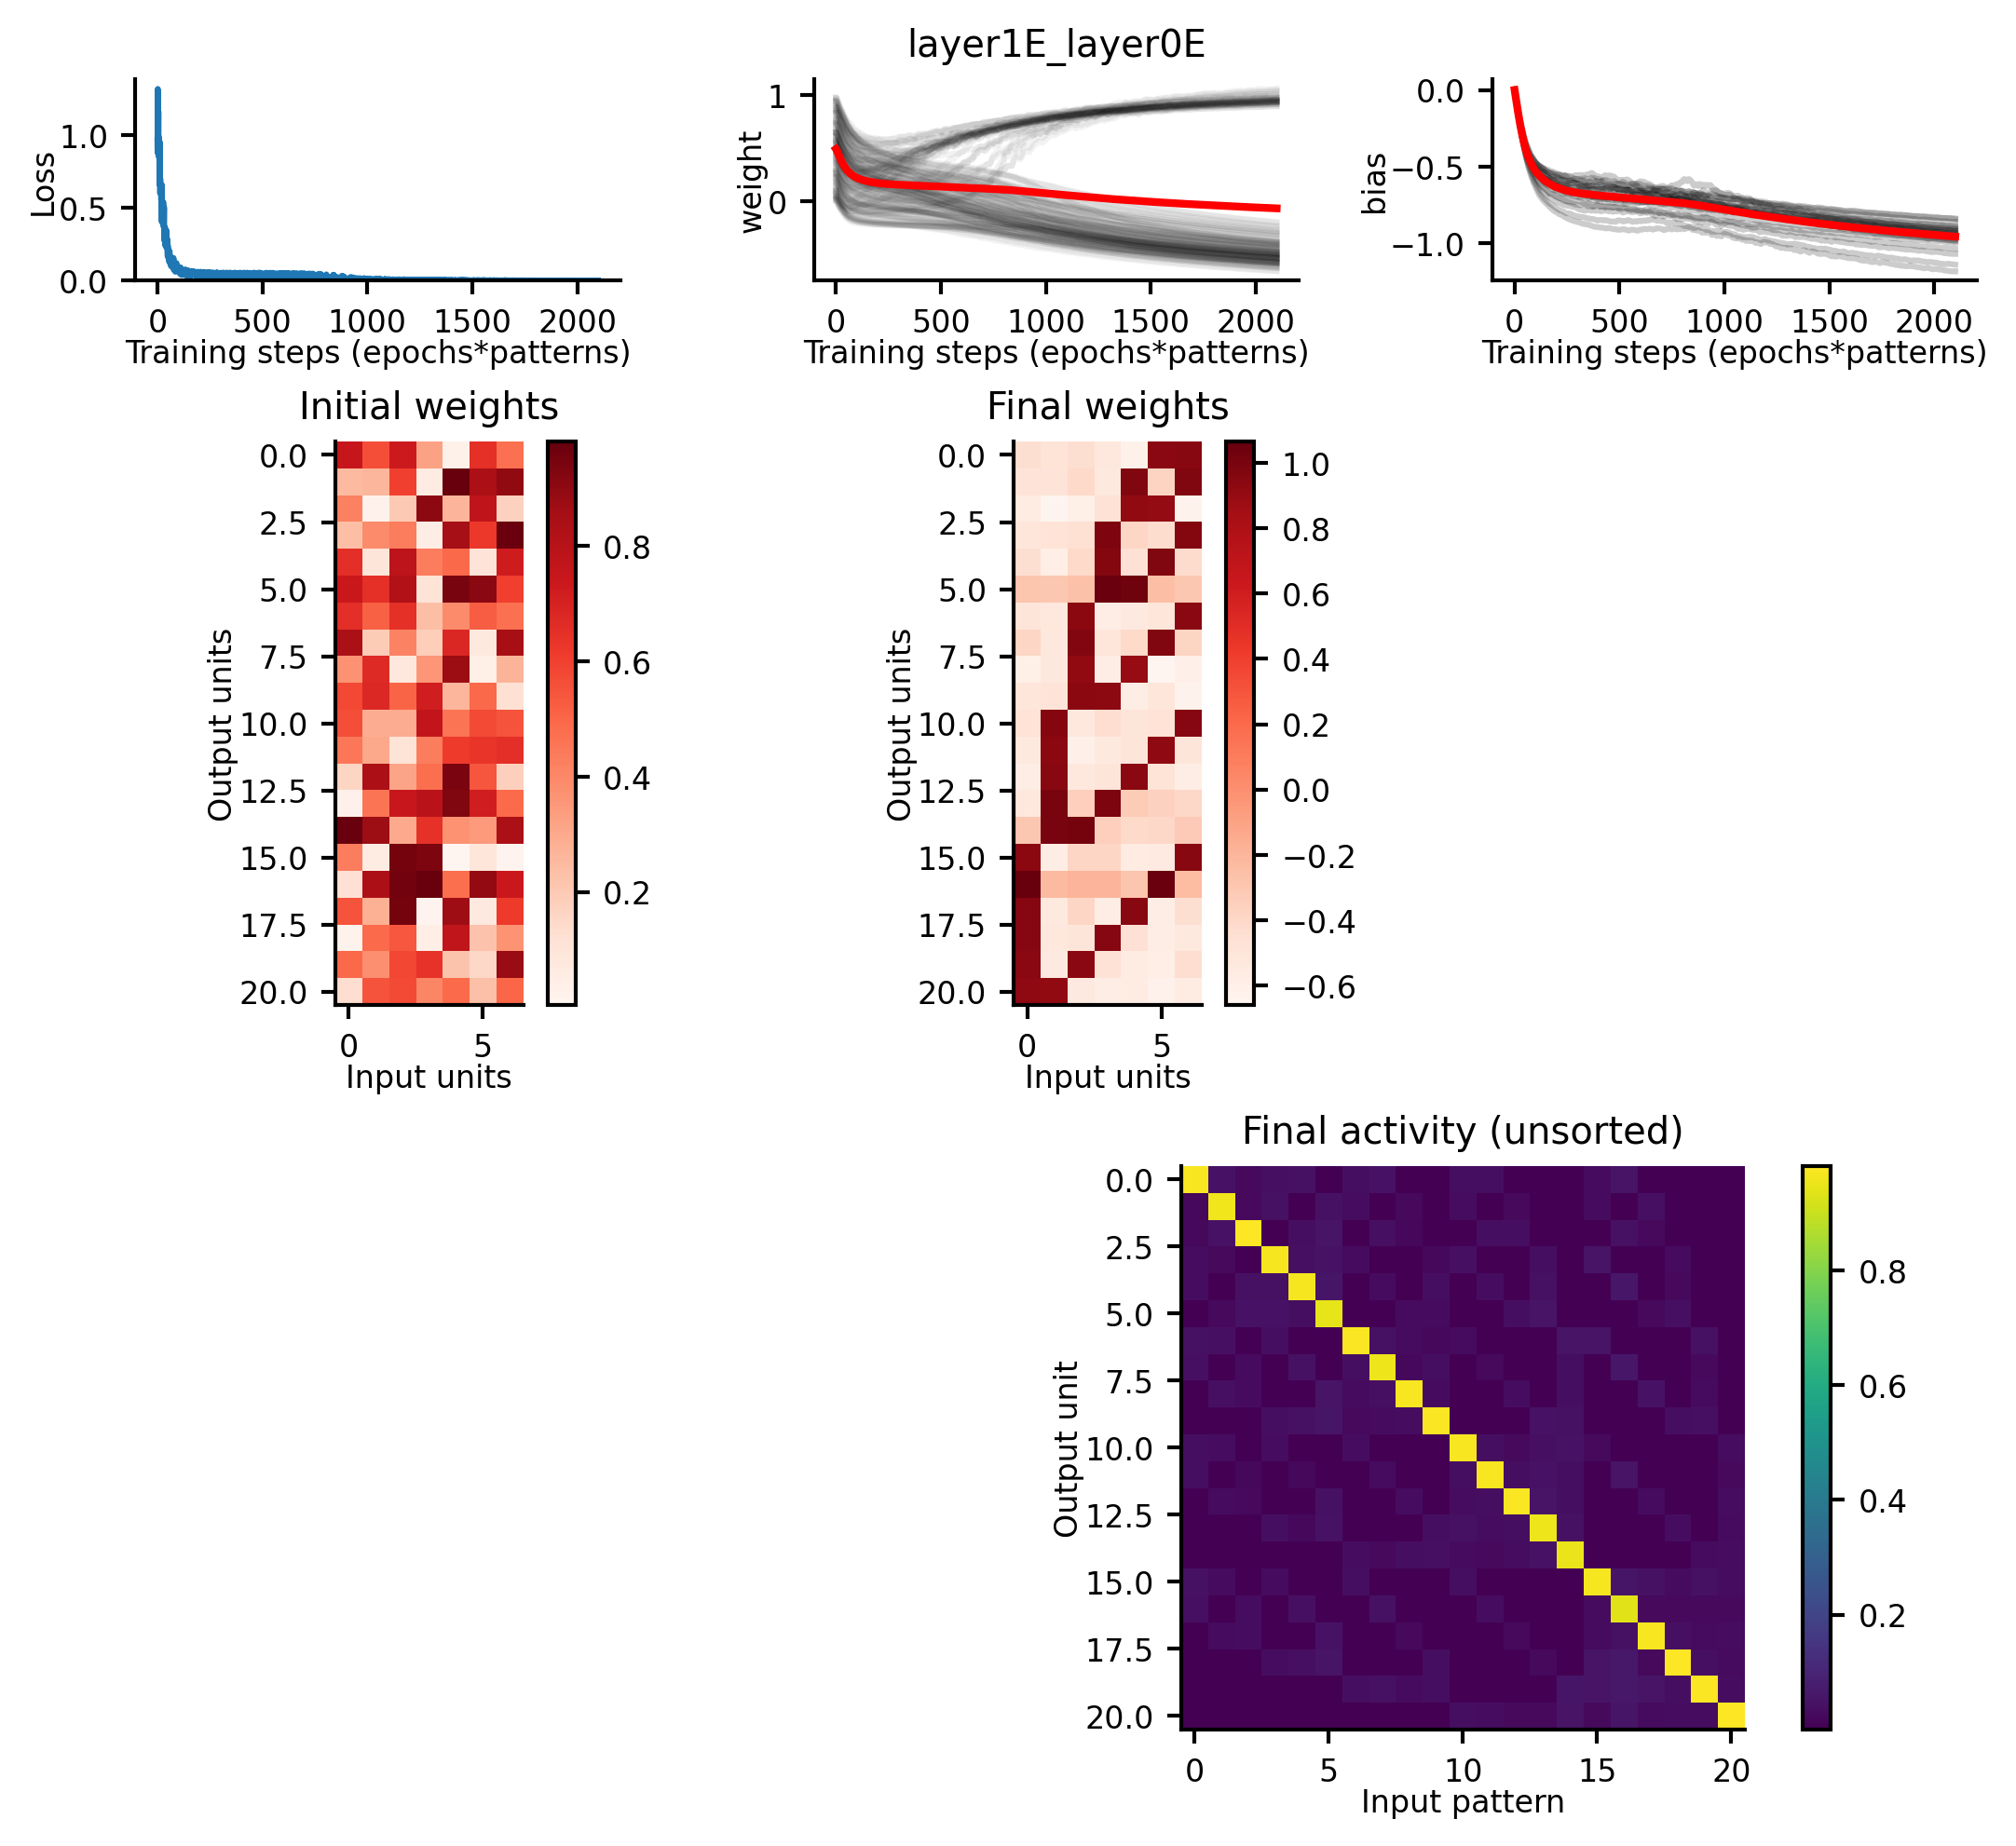

In [3]:
# Train network
all_patterns = n_hot_patterns(n=2,length=7)
all_targets = torch.eye(21)

model.train(num_epochs = 100,
            all_patterns = all_patterns,
            all_targets = all_targets,
            lr = 0.01,
            num_timesteps = 8,
            num_BPTT_steps = 8,
            plot = True)

In [4]:
model.layer1.E.activity_history.shape

torch.Size([16800, 21])